Desafio 33: Análise de Vendas por Região

📂 Dataset: Informações de vendas realizadas em diferentes regiões.
Colunas: ID_Venda, Data_Venda, Produto, Região, Quantidade, Valor_Total

🎯 Tarefas:

Corrija os dados inconsistentes e ausentes nas colunas Região e Valor_Total.

Calcule o total de vendas (Valor_Total) por região.

Qual produto foi o mais vendido em quantidade total?

Identifique o mês com maior faturamento total.

Crie um gráfico de barras mostrando o total de vendas por região.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dia_33_vendas_regiao.csv")
df.head()

,ID_Venda,Data_Venda,Produto,Região,Quantidade,Valor_Total
0,1,2024-03-07,Produto_3,Oeste,10,124.88
1,2,2024-04-27,Produto_2,Sul,7,146.05
2,3,2024-02-15,Produto_5,Sul,6,401.81
3,4,2024-03-06,Produto_7,Norte,11,572.99
4,5,2024-09-23,Produto_10,Leste,9,1877.17


In [25]:
#Corrija os dados inconsistentes e ausentes nas colunas Região e Valor_Total.
#Valor_Total
df["Valor_Total"] = pd.to_numeric(df["Valor_Total"], errors="coerce")
df["Valor_Total"] = df["Valor_Total"].fillna(
    df.groupby("Produto")["Valor_Total"].transform("mean")
).round(2)

#Região

df["Região"] = df["Região"].fillna("Indefinido")

In [28]:
#Calcule o total de vendas (Valor_Total) por região.
totalRegiao = df.groupby("Região")["Valor_Total"].sum().sort_values(ascending=False)
print(totalRegiao.to_string())

Região
Sul             46207.81
Oeste           40696.24
Norte           37420.11
Leste           32781.69
Centro-Oeste    31784.91
Indefinido        835.08


In [31]:
#Qual produto foi o mais vendido em quantidade total?
produtoQuantidade = df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)
print(produtoQuantidade.idxmax())

Produto_10


In [46]:
#Identifique o mês com maior faturamento total.
df["Data_Venda"] = pd.to_datetime(df["Data_Venda"])
df["AnoMes"] = df["Data_Venda"].dt.to_period("M")
mesFaturamento = df.groupby("AnoMes")["Valor_Total"].sum().sort_values(ascending=False)
print(mesFaturamento.idxmax())

2024-11


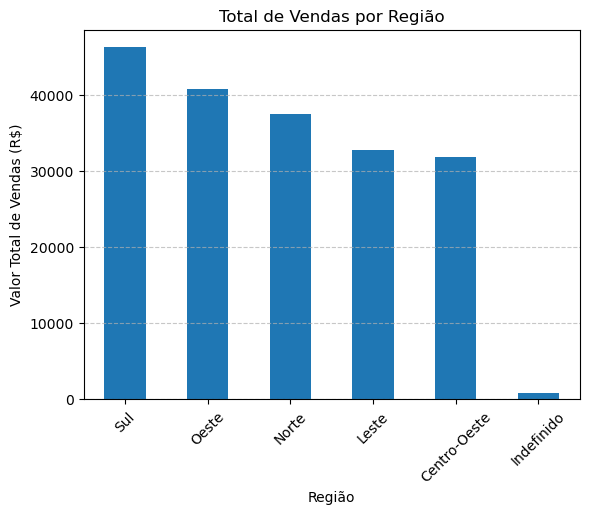

In [45]:
#Crie um gráfico de barras mostrando o total de vendas por região.
totalRegiao.plot(kind="bar")
plt.title("Total de Vendas por Região")
plt.xlabel("Região")
plt.ylabel("Valor Total de Vendas (R$)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()